In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from astropy import units
from galpy.potential import plotPotentials
from galpy.orbit import Orbit
from OmegaFerrersPotential import FerrersPotential as OFP

### ==================== Rotating potential plot - reasonable omegab set ====================

In [64]:
fp = OFP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 0)
ofp = OFP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 2*np.pi) #Pattern rotational period = 1 

In [68]:
ofp.dens(10,1,t = 0.25)==fp.dens(10,1,phi = np.pi/2)

True

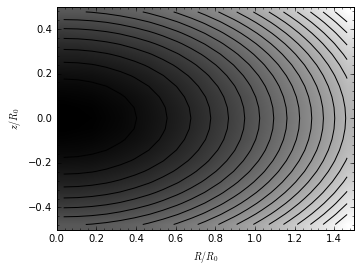

In [71]:
ofp.plot(phi = 0, t = 0., zmin=-0.5, zmax = 0.5)

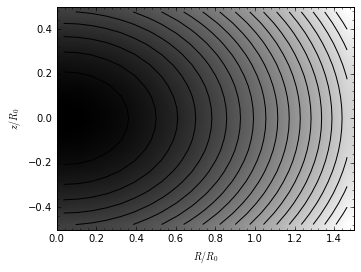

In [74]:
ofp.plot(phi = 0, t = 0.125, zmin=-0.5, zmax = 0.5)

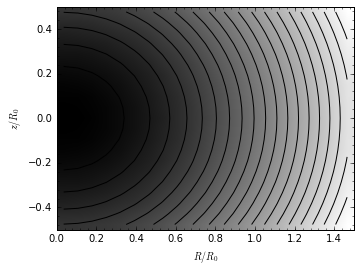

In [75]:
ofp.plot(phi = 0, t = 0.25, zmin=-0.5, zmax = 0.5)

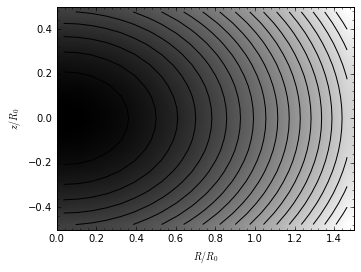

In [76]:
ofp.plot(phi = 0, t = 0.375, zmin=-0.5, zmax = 0.5)

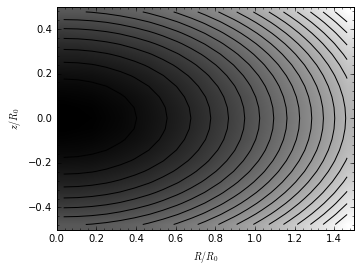

In [77]:
ofp.plot(phi = 0, t = 0.5, zmin=-0.5, zmax = 0.5)

### ========== Proof that orbits in rotating potential differ from those in the steady one ==========

In [18]:
fp = OFP(c=0.3, b=0.5, normalize = True, glorder = None)
ofp = OFP(c=0.3, b=0.5, normalize = True,glorder = None, omegab = 0.002)

# equality of reasults from the two available ways of evaluating the density:
''' 
for i in range(1,20):
    #print(ofp.dens(1+i/10,1,0)-ofp.dens(1+i/10,1,0,forcepoisson=True))
    print((ofp.dens(i,1,0)-ofp.dens(i,1,0,forcepoisson=True))/ofp.dens(i,1,0))
print()
for i in range(1,20):
    #print(ofp.dens(1,1+i/10,0)-ofp.dens(1,1+i/10,0,forcepoisson=True))
    print((ofp.dens(1,i,0)-ofp.dens(1,i,0,forcepoisson=True))/ofp.dens(1,i,0))
'''

3.11793699026e-09
5.44249682569e-09
2.81188474806e-09
5.98657475755e-08
9.89438028655e-09
1.90362547762e-10
1.27300996016e-10
2.26747474337e-11
1.90299148903e-11
1.70840939624e-11
1.70306034944e-11
1.67570043249e-11
1.70133068172e-11
1.77994919937e-11
1.92106528332e-11
2.1532669974e-11
2.53333683237e-11
3.20962585881e-11
4.66816593712e-11
4.10283481945e-11
1.49178780883e-09
-2.82828529093e-11
-1.06470833476e-11
-1.80562409113e-11
-7.63105683745e-12
-6.59776443343e-12
-5.73961608828e-12
-4.72298075261e-12
-4.20138264498e-12
-6.43744506806e-12
-5.69782358619e-12
-1.06089084774e-11
-8.91182016552e-12
-7.41369086698e-12
-6.0693880498e-12
-5.59719608228e-12
-4.81073703628e-12
-4.36595811124e-12
-3.33014628618e-12
-2.37887104847e-12
-4.69012971924e-12
-4.08210790409e-12
-2.01704358676e-11
-1.82521480216e-11
-1.65248629437e-11
-1.49660659748e-11
-1.35561457912e-11
-2.29256415108e-11
-1.11118116617e-11

3.11793699026e-09
3.93695274582e-09
2.78008794833e-11
2.1051426369e-10
2.56779879463e-10
2.

In [21]:
ts = np.linspace(0,30,200)
# reasonable number of points (with respect to integration time)
# EDIT: not necessarily!!! depends on initial conditions! see FerrersPot_intgrands.ipynb (once it is uploaded)

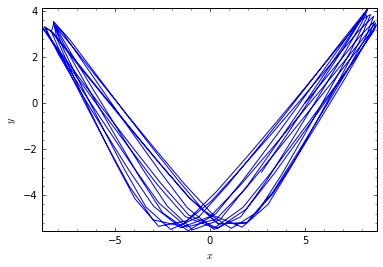

In [22]:
o = Orbit(vxvv=[5,10.,10.,0]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, ofp, method = 'leapfrog' )
o.plot()

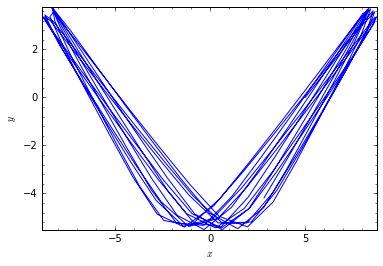

In [23]:
o = Orbit(vxvv=[5,10.,10.,0]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, fp, method = 'leapfrog' )
o.plot()

### ==================== Density and potential plotted in the same scale ====================

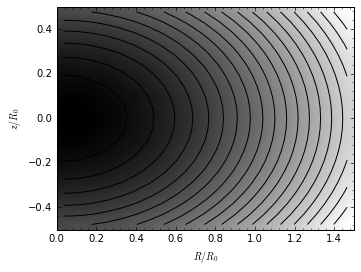

In [42]:
from galpy.potential import plotDensities
plotDensities(ofp, phi = np.pi/2)

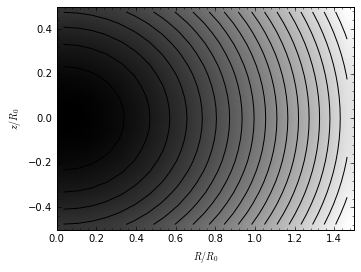

In [48]:
ofp.plot(phi = np.pi/2, t = 10., zmin=-0.5, zmax = 0.5)

### ==================== Testing the TD version of the Ferrers potential ====================

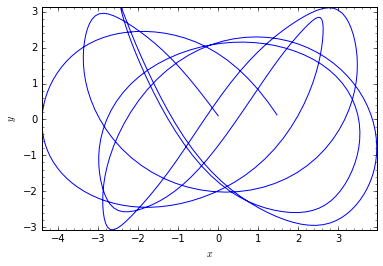

In [49]:
ts2 = np.linspace(0,50,400)
o3d = Orbit(vxvv=[0.1,3,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, fp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:543: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x**2/(a2 + tau) - y**2/(a2*b2 + tau) - z**2/(a2*c2 + tau))**expon/numpy.sqrt((a2 + tau)*(a2*b2 + tau)*(a2*c2 + tau))

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:261: RuntimeWarning: invalid value encountered in double_scalars
  return R*(-numpy.sin(phi)*Fx+numpy.cos(phi)*Fy)

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:521: RuntimeWarning: invalid value encountered in multiply
  return -(x*(i==0) + y*(i==1) + z*(i==2))/(a2*(i==0) + a2*b2*(i==1) + a2*c2*(i==2) + tau)*_FracInt(x,y,z,a2,b2,c2,tau,n)

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)



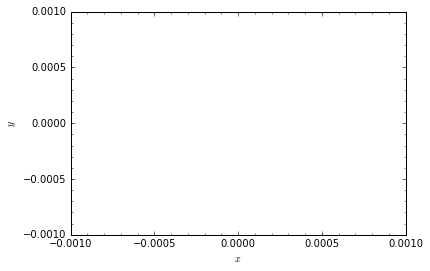

In [61]:
ts3 = np.linspace(0,500,400)
o3d = Orbit(vxvv=[0.1,3.1,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts3, ofp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

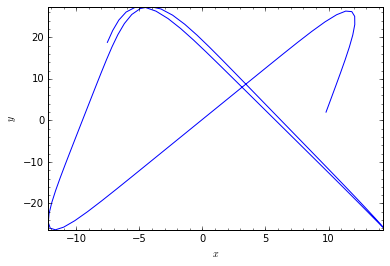

In [33]:
ts2 = np.linspace(0,10,100)
fp2 = OFP(b = 0.7, c = 0.4, glorder = None, omegab = 0)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, fp2)
o2d0.plot()

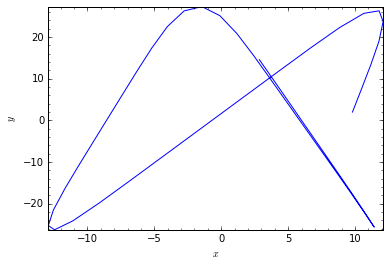

In [36]:
ts2 = np.linspace(1,10,50)
ofp2 = OFP(b = 0.7, c = 0.4, glorder = None, omegab = 0.008)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, ofp2)
o2d0.plot()

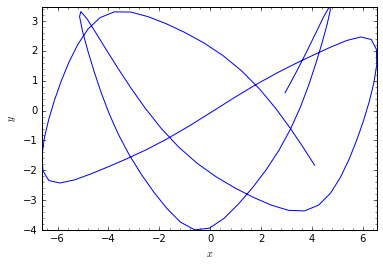

In [39]:
ts = np.linspace(0,20,100)
o2d0 = Orbit(vxvv=[3,3.,3.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi]) #4:51-5:10
o2d0.integrate(ts, ofp)
o2d0.plot()

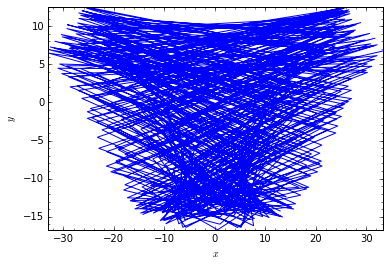

In [27]:
omega2d0 = Orbit(vxvv=[34,30.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi]) #4:18-4:46 - not a good idea 
omega2d0.integrate(ts, ofp) #(not sure what the ts was here as I changed it afterwards)
omega2d0.plot()

In [8]:
from galpy.potential import epifreq
epifreq(fp,0.8)

2.0030984826030376

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:543: RuntimeWarning: overflow encountered in square
  return (1 - x**2/(a2 + tau) - y**2/(a2*b2 + tau) - z**2/(a2*c2 + tau))**expon/numpy.sqrt((a2 + tau)*(a2*b2 + tau)*(a2*c2 + tau))

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:218: RuntimeWarning: invalid value encountered in double_scalars
  return numpy.cos(phi)*Fx+numpy.sin(phi)*Fy

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:521: RuntimeWarning: invalid value encountered in multiply
  return -(x*(i==0) + y*(i==1) + z*(i==2))/(a2*(i==0) + a2*b2*(i==1) + a2*c2*(i==2) + tau)*_FracInt(x,y,z,a2,b2,c2,tau,n)



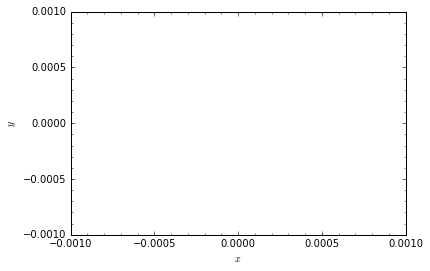

In [115]:
# one of runtime warnings/errors I get: 

np.seterr('warn')
pot = OFP(c=0.3, b=0.5, normalize = True, omegab = 0.01*2*np.pi)
ts2 = np.linspace(0,142.5,400)
o3d = Orbit(vxvv=[0.5,.7,2,0.5,0.,0]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, pot, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

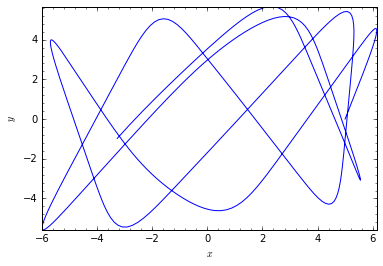

In [59]:
potsteady = OFP(c=0.3, b=0.5, normalize = True, omegab = 0.05)
ts2 = np.linspace(0,7.455,400)
o3d = Orbit(vxvv=[5,5.7,20,0.5,0.1,0]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, potsteady, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')